In [91]:
import pandas as pd
import polars as pl
import os
import math
import matplotlib.pyplot as plt

In [72]:
folder_path = r'C:\Users\leoac\OneDrive - Università degli Studi di Milano\Data science\Football\Betting\Corners'
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

In [95]:
# POLARS
concatenated_data = pl.DataFrame()
for csv_file in csv_files:
    file_path = os.path.join(folder_path,csv_file)
    df = pl.read_csv(file_path, separator=";")
    concatenated_data = pl.concat((concatenated_data,df),how='diagonal_relaxed')
concatenated_data = concatenated_data.rename({"Reliability of the forecast": "reliability"})

def evaluate_predictions(thr = 20, print_entire_df=False, print_filtered_df=False):
    filtered_data = concatenated_data.filter(pl.col("reliability") > thr)
    correct_pred = filtered_data['Correct_prediction'].sum()
    all_pred = len(filtered_data)
    perc_correct = round((correct_pred)/all_pred*100,2)
    # print(f"{correct_pred}/{all_pred} ({perc_correct}%) correctly predicted games with reliability greater than {thr}%.")
    if print_entire_df:
        print(concatenated_data)
    if print_filtered_df:
        print(filtered_data)
    return (correct_pred, perc_correct)

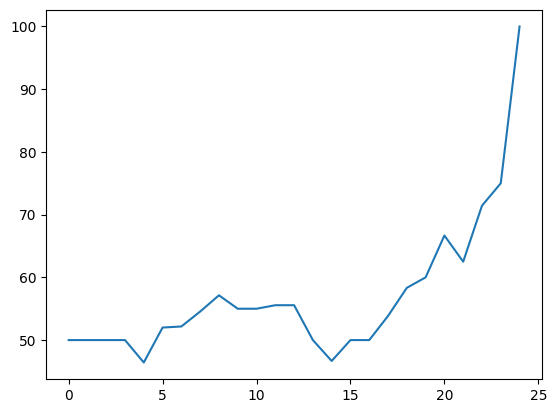

In [96]:
perc_list = []
for threshold in range(math.ceil((concatenated_data['reliability'].max()))):
    perc = evaluate_predictions(thr=threshold)[1]
    perc_list.append(perc)

plt.plot(perc_list);

In [9]:
# # PANDAS
# concatenated_data_pd = pd.DataFrame()
# for csv in csv_files:
#     file = os.path.join(folder_path, csv)
#     concatenated_data_pd = pd.concat((concatenated_data_pd, pd.read_csv(file, sep=";")), ignore_index=True)
# thr = 20
# filtered_predictions = concatenated_data_pd[concatenated_data_pd['Reliability of the forecast']>thr]
# filtered_predictions['Correct_prediction'].sum()/len(filtered_predictions)
# concatenated_data_pd